
# Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

from this dataset we could try to solve many different question such as:

1.What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

2.Does age affect the attendence?

3.Does age and chronic diseases affect the attendence ?

4.what is the percentage of Gender attendence?

5.what is the percentage of Gender absent?

6.Does age and gender affect the attendence?

7.Does receiving SMS affect the attendence?

8.Does neighbourhood affect the attendence?

for analysis included in the notebook I have choosen to look at the following 4 questions:

1.What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

2.Does age and chronic diseases affect the attendence ?

3.Does receiving SMS affect the attendence?

4.Does neighbourhood affect the attendence?
 

### Dataset Description
We will analyze noshowappointments-may-2016.csv file contains the data


In [1]:
#import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
In this section of the report, we will load in the data, check for cleanliness, then trim and clean dataset for analysis

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# view dimensions of dataset
df.shape

(110527, 14)

Data consist of 110527 rows and 14 columns

In [4]:
df.duplicated().sum()

0

there is no identical duplication of the rows

In [5]:
#check the number of the unique value
df['PatientId'].nunique()

62299

there are 62299 from 110527 unique values

In [6]:
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 patients Ids have the same status of showing or no, we will remove them in the cleaning data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing values

In [8]:
#view some information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37, max age is 115, min is -1 which is probably mistake

In [9]:
#getting the row index of -1 value for the age
mask= df.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning

In [10]:
#removing the -1 value  
df.drop(index=99832,inplace=True)

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#correction of columns names
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# removing duplicated Ids with duplicated showing status ,leaving the duplicated Ids if they differ in the showing status
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [14]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
Now that we have trimmed and cleaned data, ready to move on to exploration, computing statics and creating visuallizations  

### General look

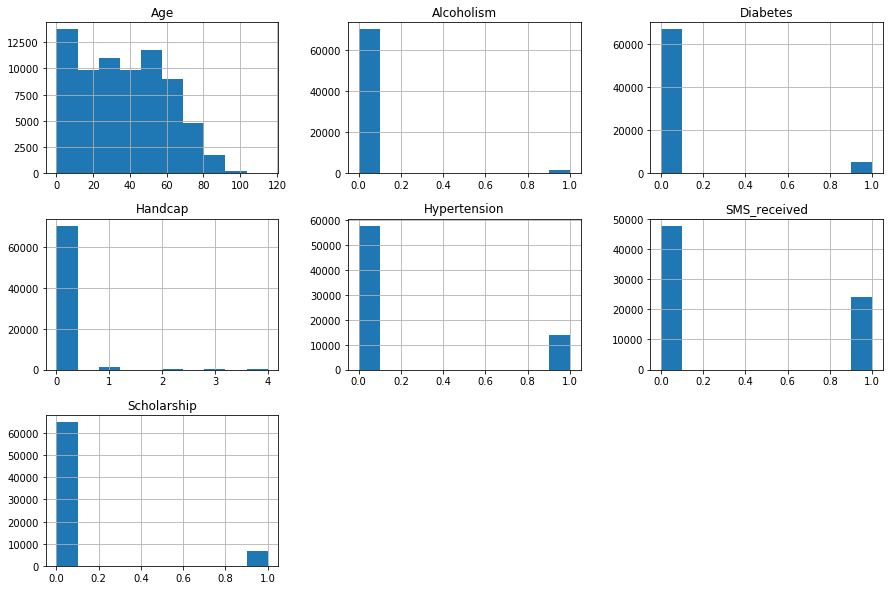

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,10));

. most of the patients didn't suffer from chronic diseases nor are handicapped
. about 18% suffered from hypertension
. Number of patients who received an SMS is half the number of those who did not
. about 9% are enrolled in the Brasilian welfare programe

In [16]:
# dividing the patients to 2 groups acc to showing or not showing
show= df.No_show=='No'
noshow= df.No_show=='Yes'

In [17]:
df[show].count()

Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64

In [18]:
df[noshow].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64

No of showed patients is (54153) 3 times greater than non showed (17663)

In [19]:
df[show].mean(), df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patients is 37, no showed is 34, showed patients received SMS less than no show patients

### Investigation for the influencing factors on the attendance rate

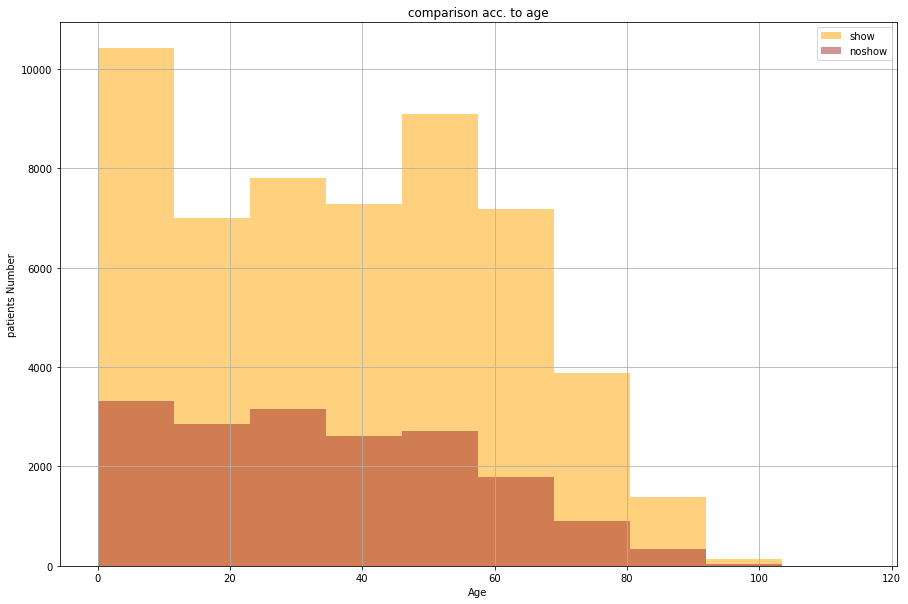

In [20]:
#Does age affect the attendence
def attendance(df,name,attendenced,absent):
    plt.figure(figsize=[15,10])
    df[name][show].hist(alpha=0.5,bins=10,color='orange',label='show')
    df[name][noshow].hist(alpha=0.5,bins=10,color='brown',label='noshow')
    plt.legend();
    plt.title('comparison acc. to age')
    plt.xlabel('Age')
    plt.ylabel('patients Number');
attendance(df,'Age',show,noshow)

Age from 0 to 10 are the most showing then from 45 to 55 and the least attending are whomabove 65 years old

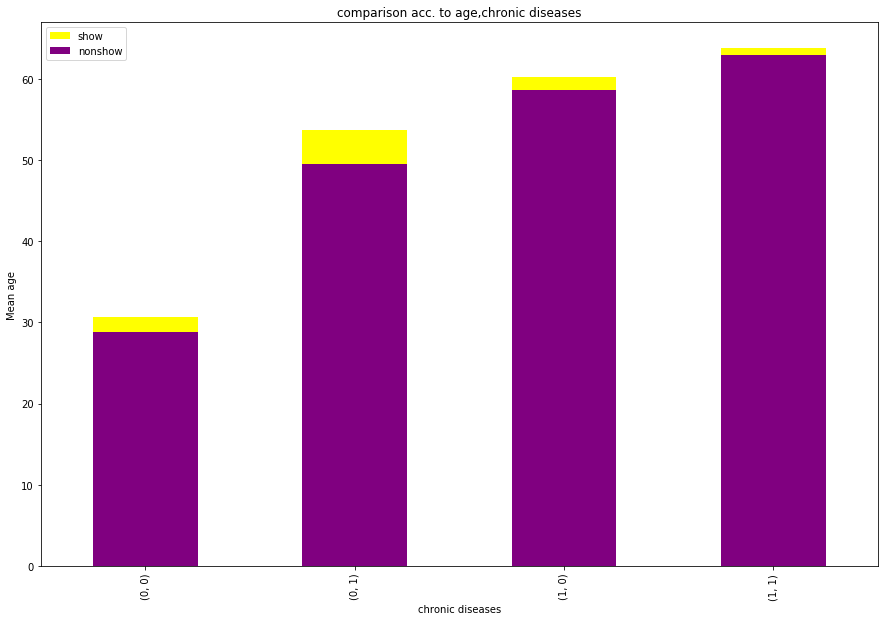

In [21]:
#Does age and chronic diseases affect the attendence 
plt.figure(figsize=[15,10])  
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='yellow',label='show') 
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='purple',label='nonshow') 
plt.legend();
plt.title('comparison acc. to age,chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [22]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'], df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non chronic disease show patients is 30 and non show is 28 ,mean age of Hypertenstion show patients is arround 64 and nonshow is arrond 63 which means that there is a no correlation between chronic disease and attending


## Does gender affect the attendence?

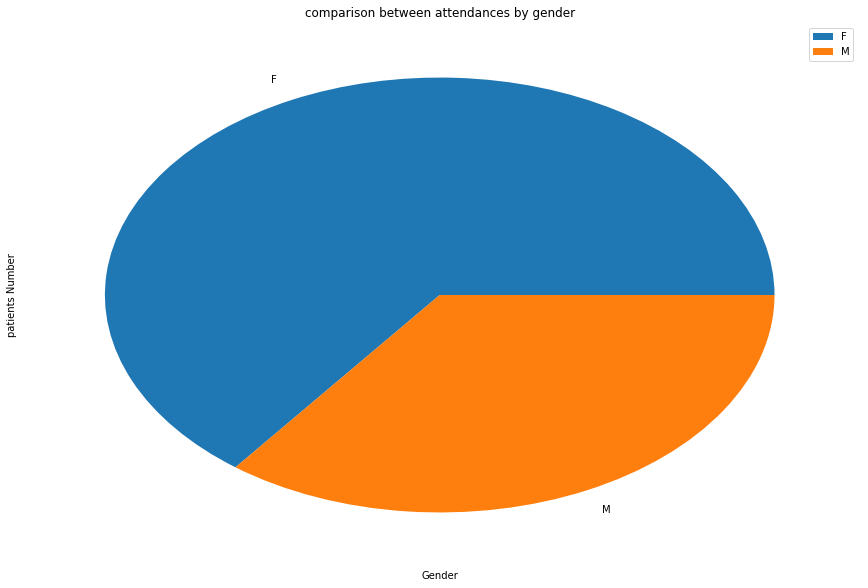

In [23]:
#what is the percentage of Gender attendence?
def attendance(df,name,attendenced):
    plt.figure(figsize=[15,10])
    df[name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparison between attendances by gender')
    plt.xlabel('Gender')
    plt.ylabel('patients Number');
attendance(df,'Gender',show)

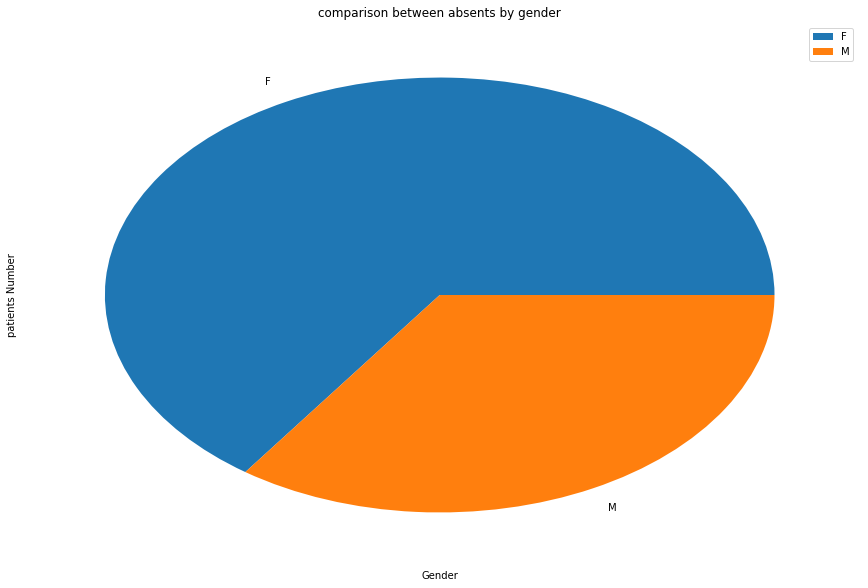

In [24]:
#what is the percentage of Gender absent?
def attendance(df,name,absent):
    plt.figure(figsize=[15,10])
    df[name][noshow].value_counts(normalize=True).plot(kind='pie',label='noshow')
    plt.legend();
    plt.title('comparison between absents by gender')
    plt.xlabel('Gender')
    plt.ylabel('patients Number');
attendance(df,'Gender',noshow)

Gender has no effect on the attendance

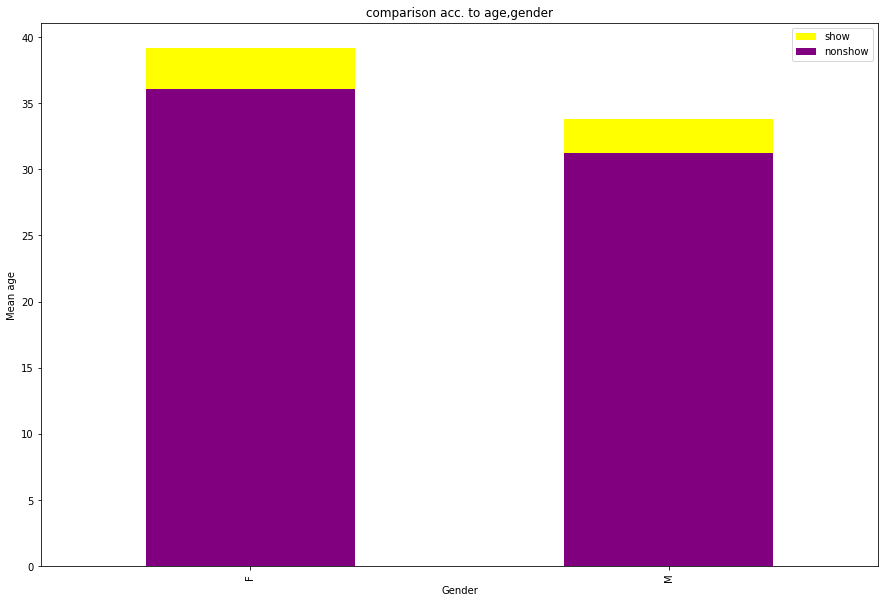

In [25]:
#check by Gender mean age
plt.figure(figsize=[15,10])  
df[show].groupby(['Gender']).mean()['Age'].plot(kind='bar',color='yellow',label='show') 
df[noshow].groupby(['Gender']).mean()['Age'].plot(kind='bar',color='purple',label='nonshow') 
plt.legend();
plt.title('comparison acc. to age,gender')
plt.xlabel('Gender')
plt.ylabel('Mean age');

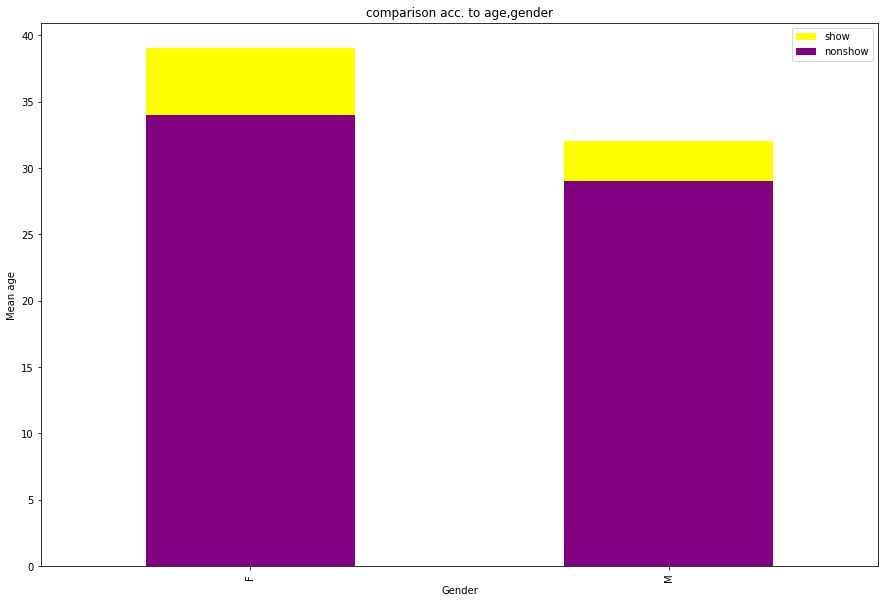

In [26]:
#check by Gender median age
plt.figure(figsize=[15,10])  
df[show].groupby('Gender').median('Age').plot(kind='bar',color='yellow',label='show') 
df[noshow].groupby(['Gender']).median()['Age'].plot(kind='bar',color='purple',label='nonshow') 
plt.legend();
plt.title('comparison acc. to age,gender')
plt.xlabel('Gender')
plt.ylabel('Mean age');

In [27]:
print(df[show].groupby('Gender').mean()['Age'], df[noshow].groupby('Gender').mean()['Age'],df[show].groupby('Gender').median()['Age'], df[noshow].groupby('Gender').median()['Age'])

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


the mean and the median of gender ages are almost the same

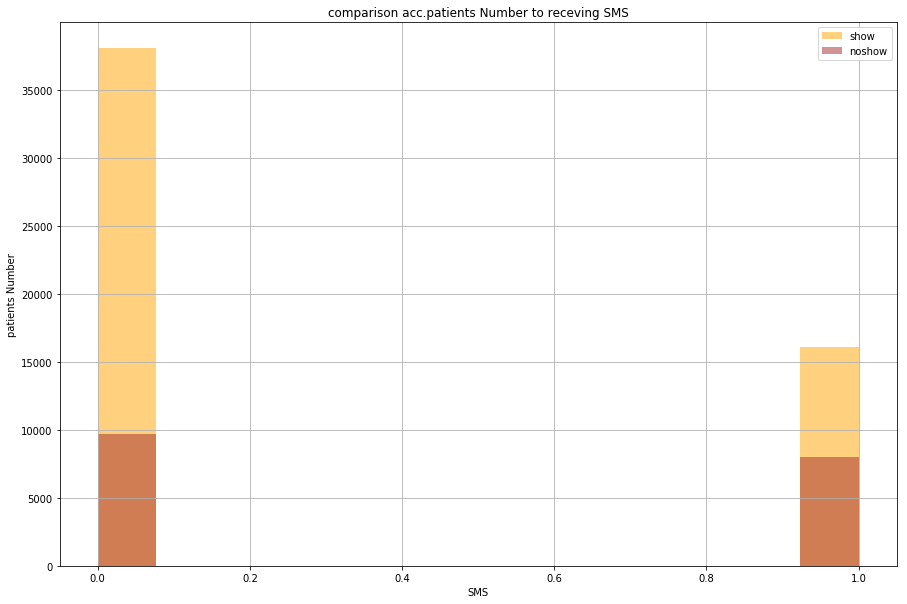

In [103]:
def attendance(df,name,attendenced,absent):
    plt.figure(figsize=[15,10])
    df[name][show].hist(alpha=0.5,bins=13,color='orange',label='show')
    df[name][noshow].hist(alpha=0.5,bins=13,color='brown',label='noshow')
    plt.legend();
    plt.title('comparison acc.patients Number to receving SMS')
    plt.xlabel('SMS')
    plt.ylabel('patients Number');
attendance(df,'SMS_received',show,noshow)

Number of showing patients without receiving SMS is greater than showing patients with receiving SMS

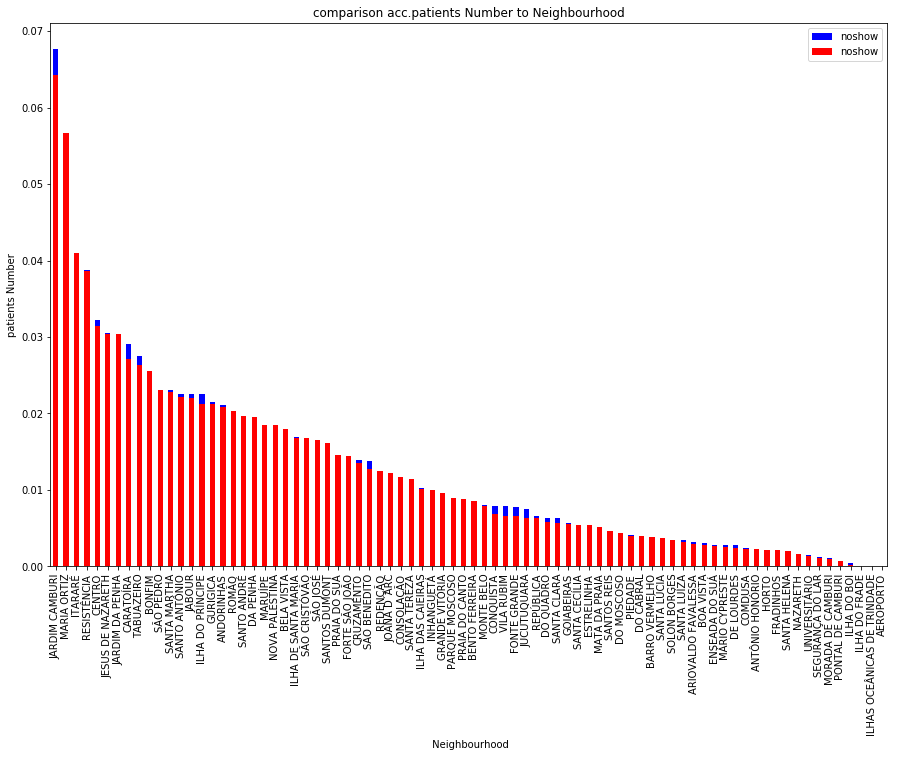

In [104]:
plt.figure(figsize=[15,10])  
df. Neighbourhood[show].value_counts(normalize=True).plot(kind='bar',color='blue',label='noshow') 
df. Neighbourhood[noshow].value_counts(normalize=True).plot(kind='bar',color='red',label='noshow')  
plt.legend();
plt.title('comparison acc.patients Number to Neighbourhood')
plt.xlabel(' Neighbourhood')
plt.ylabel('patients Number');

Neighbourhood has effect on attendence or absent, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate

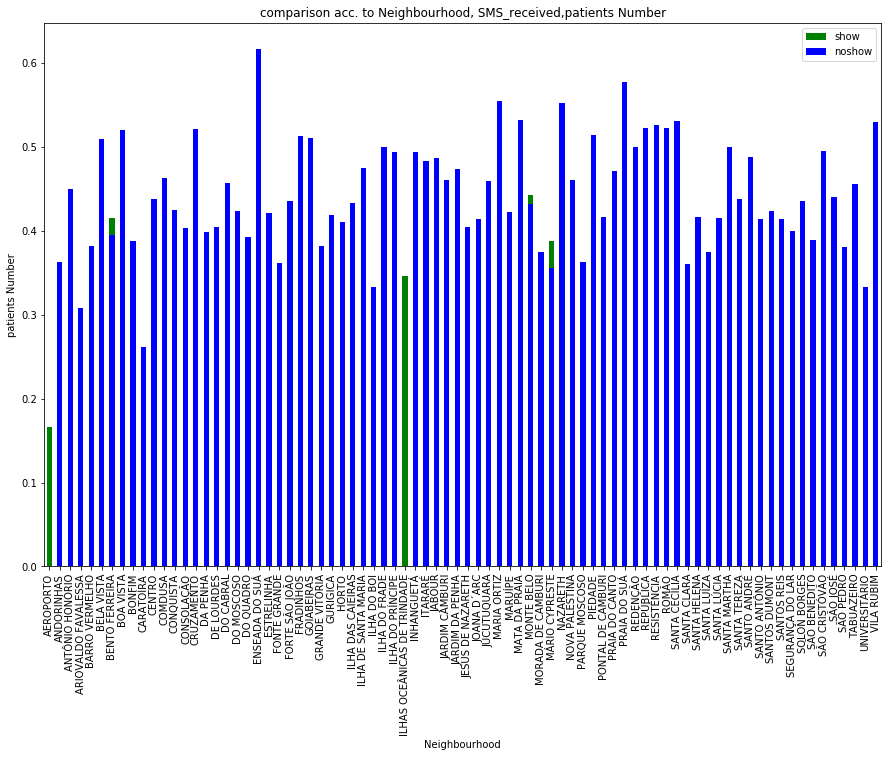

In [105]:
plt.figure(figsize=[15,10])  
df[show].groupby('Neighbourhood').mean()['SMS_received'].plot(kind='bar',color='green',label='show') 
df[noshow].groupby('Neighbourhood').mean()['SMS_received'].plot(kind='bar',color='blue',label='noshow') 
plt.legend();
plt.title('comparison acc. to Neighbourhood, SMS_received,patients Number')
plt.xlabel('Neighbourhood')
plt.ylabel('patients Number');

SMS has effect in only 5 Neighbourhood 

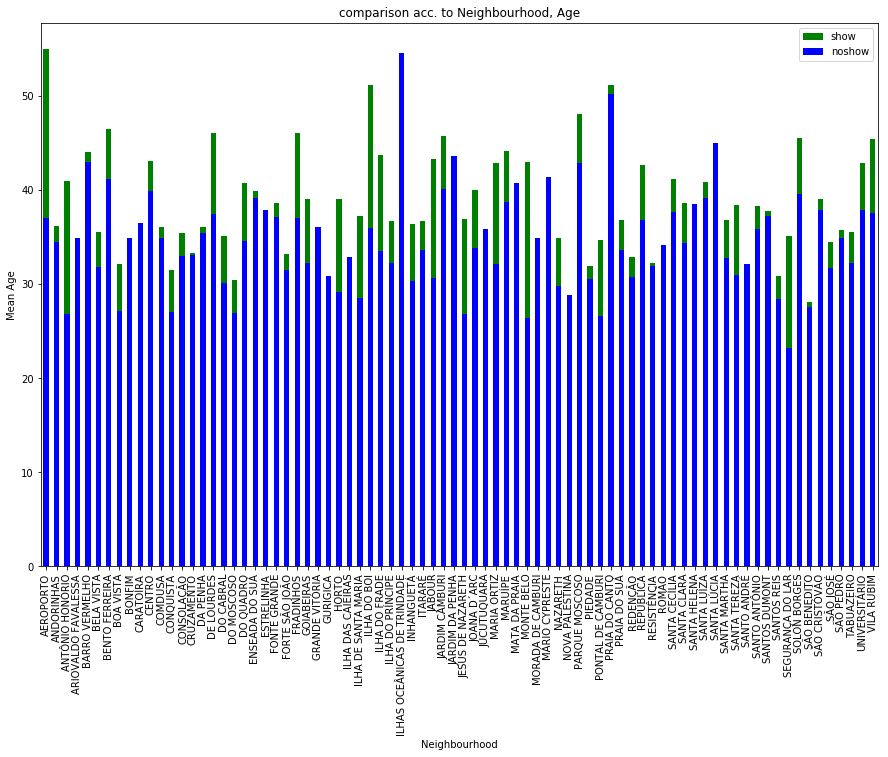

In [106]:
plt.figure(figsize=[15,10])  
df[show].groupby('Neighbourhood').mean()['Age'].plot(kind='bar',color='green',label='show') 
df[noshow].groupby('Neighbourhood').mean()['Age'].plot(kind='bar',color='blue',label='noshow') 
plt.legend();
plt.title('comparison acc. to Neighbourhood, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Age');

patients attendance from specific neighbourhood differ acc.to ages

<a id='conclusions'></a>
## Conclusions
Results:

1-mean age of non chronic disease show patients is 30 and non show is 28 ,mean age of Hypertenstion show patients is arround 64 and nonshow is arrond 63 which means that there is a no correlation between chronic disease and attending.

2-Number of showing patients without receiving SMS is greater than showing patients with receiving SMS.

3-Neighbourhood has effect on attendence or absent, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate.

4-patients attendance from specific neighbourhood differ acc.to ages.

5- people that have a disease are 3% more likely to show up for the appointment than people who do have a disease.

6-Number of patients who received an SMS is half the number of those who did not. 

7-about 9% are enrolled in the Brasilian welfare programe

limitations:

1.No clear correlation between showing and gender, chronic disease, enrollment in the welfare program

2.We do not have a lot details for certain factors to draw conclusions. For the SMS_received example, the data shows that no-shows are more likely to receive an SMS. This may seem counter intuitive, but we do not have information on the conditions of when the SMS is sent.

In [108]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255